Objective : To find out given Xray having Pneumonia affected or not to through CNN(deep learning)


In [15]:
data_set = "/content/drive/MyDrive/ML_PROJECT/Chest_X_ray.zip"

In [16]:
import zipfile

In [17]:
data_set

'/content/drive/MyDrive/ML_PROJECT/Chest_X_ray.zip'

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [25]:
train_dir = "/content/drive/MyDrive/ML_PROJECT/chest_xray/train"
validation_dir = "/content/drive/MyDrive/ML_PROJECT/chest_xray/val"
test_dir = "/content/drive/MyDrive/ML_PROJECT/chest_xray/test"

In [23]:
with zipfile.ZipFile("/content/drive/MyDrive/ML_PROJECT/Chest_X_ray.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/ML_PROJECT")

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Scale pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Horizontally shift images
    height_shift_range=0.2,    # Vertically shift images
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill in new pixels created by transforms
)
validation_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='categorical',shuffle=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='categorical')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 537ms/step - accuracy: 0.7275 - loss: 0.5874 - val_accuracy: 0.7500 - val_loss: 0.5735
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 516ms/step - accuracy: 0.8403 - loss: 0.3604 - val_accuracy: 0.6875 - val_loss: 0.8536
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 533ms/step - accuracy: 0.8525 - loss: 0.3326 - val_accuracy: 0.7500 - val_loss: 0.8185
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 534ms/step - accuracy: 0.8791 - loss: 0.2748 - val_accuracy: 0.8125 - val_loss: 0.5440
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 521ms/step - accuracy: 0.8875 - loss: 0.2732 - val_accuracy: 0.8750 - val_loss: 0.4819


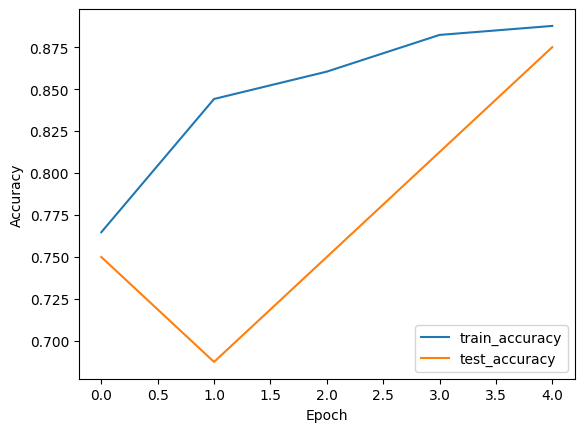

In [50]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [56]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.8633 - loss: 0.3496
Test Loss: 0.3406144976615906
Test Accuracy: 0.8685897588729858


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step


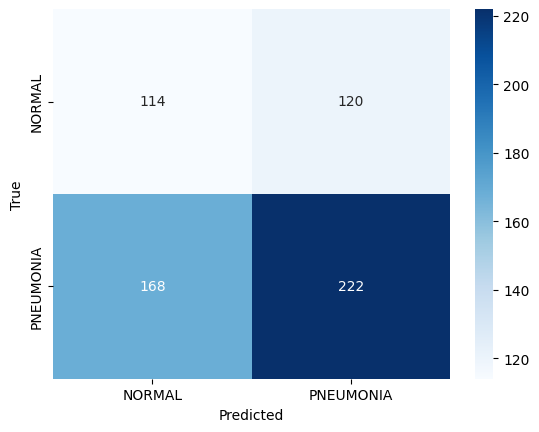

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the generator
y_true = test_generator.classes

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


              precision    recall  f1-score   support

      NORMAL       0.40      0.49      0.44       234
   PNEUMONIA       0.65      0.57      0.61       390

    accuracy                           0.54       624
   macro avg       0.53      0.53      0.52       624
weighted avg       0.56      0.54      0.54       624



20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step


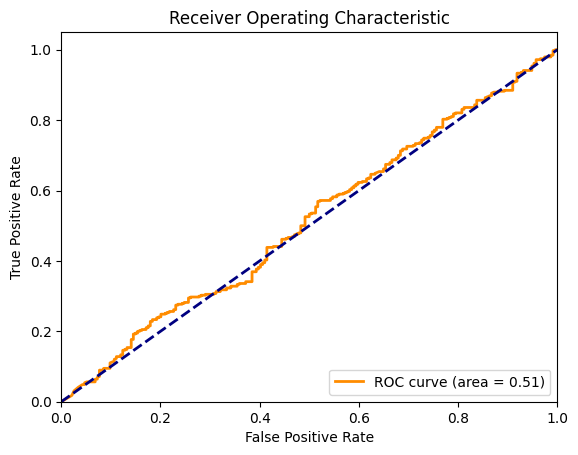

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores for each class (needed for ROC)
y_pred_prob = model.predict(test_generator)
fpr, tpr, _ = roc_curve(y_true, y_pred_prob[:, 1])  # for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
